In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
model = load_model('model/best_model.epoch05-accuracy0.82838.hdf5')
titles_str = ['bumper_dent','bumper_scratch','door_dent','door_scratch',
              'glass_shatter','head_lamp','no_damage','smash','tail_lamp']
test_image_dir = 'test_images'

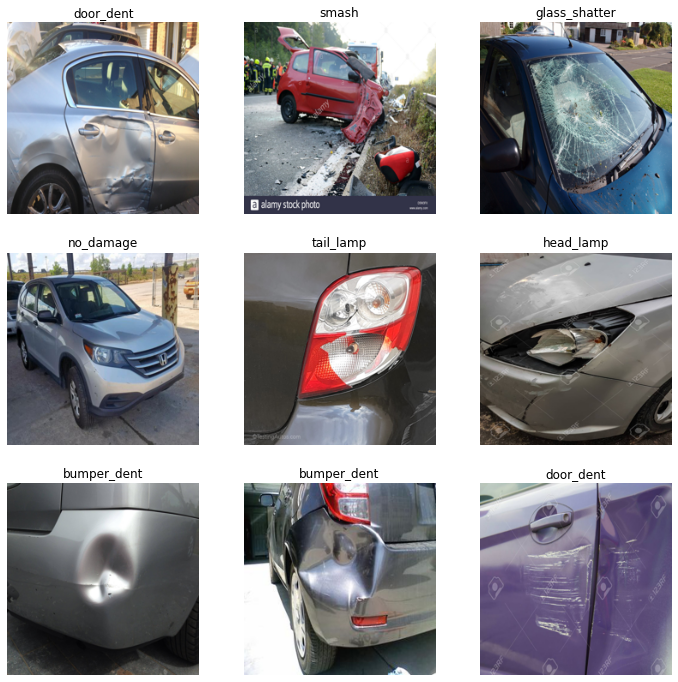

In [3]:
plt.figure(figsize=(12, 12))
for i, pic in enumerate(os.listdir(test_image_dir)):
    with Image.open(test_image_dir+'/'+pic) as im:
        im = im.resize((224, 224))
        im = im.convert('RGB')
        im = np.array(im)
        
    im2 = im.copy()
#     plt.imshow(im) # display the image

    im = preprocess_input(im)
    im = np.expand_dims(im, axis=0) # making the image into a batch of size 1
    
#     print(pic)
    prediction = tf.math.argmax(tf.nn.softmax(model.predict(im)), axis=1).numpy()
    title = titles_str[int(prediction)]
    
#     plt.imshow(im2)
#     plt.title(title)
#     plt.axis("off")
#     plt.show()
#     print()
    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(im2)
    plt.title(title)
    plt.axis("off")